### Step-1: Data Pre-processing Step:



#### importing libraries  :


In [111]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

#### importing datasets :  


In [112]:
df = pd.read_csv(r'C:\Users\PALLAVI\Downloads\50_Startups.csv')  


#### View Top 5 Rows :

In [113]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### View Bottom 5 Rows :

In [114]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


#### Display number of Rows & Columns :

In [115]:
df.shape

(50, 5)

#### Display DataTypes :

In [116]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

#### View Some Information :

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### Check for any missing / null values in the data :

In [118]:
df.isnull().values.any()

False

#### View Some Statistics :

In [119]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


#### Check value count of "Categorical" variable :

In [120]:
df["State"].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

#### Encoding Dummy Variables :


In [121]:
df_dummies = pd.get_dummies(df["State"])

In [122]:
df_dummies.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


#### Combine Numerical and Dummy Variables :

In [123]:
df_combined = pd.concat([ df , df_dummies] ,axis=1)

In [124]:
df_combined.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


#### Drop "State" Column :

In [125]:
df_combined = df_combined.drop(['State']  , axis =1 )


In [126]:
df_combined.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


#### Copy "Profit" Column :

In [127]:
df_combined['profit'] = df_combined['Profit']


In [128]:
df_combined.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York,profit
0,165349.20,136897.80,471784.10,192261.83,0,0,1,192261.83
1,162597.70,151377.59,443898.53,191792.06,1,0,0,191792.06
2,153441.51,101145.55,407934.54,191050.39,0,1,0,191050.39
3,144372.41,118671.85,383199.62,182901.99,0,0,1,182901.99
4,142107.34,91391.77,366168.42,166187.94,0,1,0,166187.94


#### Drop "Profit" Column :

In [129]:
df_combined = df_combined.drop(['Profit']  , axis =1 )


In [130]:
df_combined.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York,profit
0,165349.20,136897.80,471784.10,0,0,1,192261.83
1,162597.70,151377.59,443898.53,1,0,0,191792.06
2,153441.51,101145.55,407934.54,0,1,0,191050.39
3,144372.41,118671.85,383199.62,0,0,1,182901.99
4,142107.34,91391.77,366168.42,0,1,0,166187.94


#### View some correlation :

In [131]:
df_combined.corr()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York,profit
R&D Spend,1.000000,0.241955,0.724248,-0.143165,0.105711,0.039068,0.972900
Administration,0.241955,1.000000,-0.032154,-0.015478,0.010493,0.005145,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,-0.168875,0.205685,-0.033670,0.747766
California,-0.143165,-0.015478,-0.168875,1.000000,-0.492366,-0.515152,-0.145837
Florida,0.105711,0.010493,0.205685,-0.492366,1.000000,-0.492366,0.116244
New York,0.039068,0.005145,-0.033670,-0.515152,-0.492366,1.000000,0.031368
profit,0.972900,0.200717,0.747766,-0.145837,0.116244,0.031368,1.000000


#### Visualise Correlation Using Heatmap :

<IPython.core.display.Javascript object>

<AxesSubplot:>

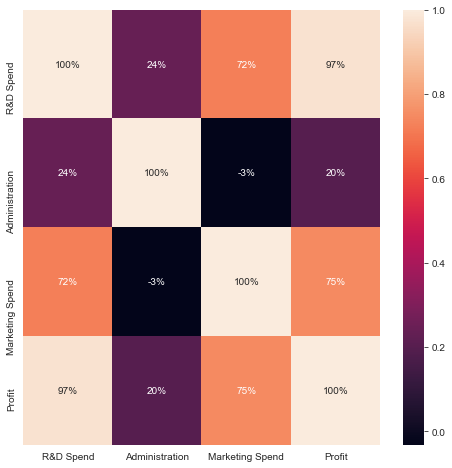

In [132]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr() , annot = True , fmt = '.0%')

#### Extracting dependent and independent Variables :


In [133]:
x= df_combined.iloc[:, :-1]
y= df_combined.iloc[:, 6] 

In [134]:
x.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [135]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: profit, dtype: float64

#### Splitting the dataset into training and test set : 


In [136]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

### Step: 2- Fitting our Milti Linear Regression model to the Training set :


In [137]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  

LinearRegression()

### Step: 3- Prediction of Test set results :


In [138]:
y_pred = regressor.predict(x_test)  


In [139]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

#### Check the score for training dataset and test dataset :

In [140]:
print('Train Score: ', regressor.score(x_train, y_train))  


Train Score:  0.9501847627493607


In [141]:
print('Test Score: ', regressor.score(x_test, y_test))  


Test Score:  0.9347068473282423


In [142]:
print(regressor.intercept_)

42467.52924855314


In [143]:
coeff_df = pd.DataFrame(regressor.coef_,x_test.columns,columns=["coefficient"])

In [144]:
coeff_df

,coefficient
R&D Spend,0.773467
Administration,0.032885
Marketing Spend,0.036610
California,86.638369
Florida,-872.645791
New York,786.007422


In [145]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [146]:
x= sm.add_constant(x_train)

In [147]:
model=sm.OLS(y_train,x_train)

In [148]:
model

In [149]:
result= model.fit()

In [150]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     129.7
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           3.91e-21
Time:                        15:53:16   Log-Likelihood:                -421.10
No. Observations:                  40   AIC:                             854.2
Df Residuals:                      34   BIC:                             864.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.7735      0.055     14.025      0.000       0.661       0.886
Administration      0.0329      0.066      0.495      0.624      -0.102       0.168
Marketing Spend     0.0366      0.019      1.884      0.068      -0.003       0.076
California       4.255e+04   8358.538      5.091      0.000    2.56e+04    5.95e+04
Florida          4.159e+04   9015.583      4.614      0.000    2.33e+04    5.99e+04
New York         4.325e+04   8315.816      5.201      0.000    2.64e+04    6.02e+04
==============================================================================
Omnibus:                       15.823   Durbin-Watson:                   2.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.231
Skew:                          -1.094   Prob(JB):                     9.03e-06
Kurtosis:                       6.025   Cond. No.                     2.52e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

####  Coefficient of Determine :

In [151]:
y_pred = regressor.predict(x_test)

In [152]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [153]:
from sklearn.metrics import mean_squared_error,r2_score

In [154]:
mse = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test,y_pred)

In [155]:
from math import sqrt
rmse=sqrt(mse)

In [156]:
print(mse)


83502864.03257766


In [157]:
print(rmse)


9137.99015279496


In [158]:
print(r_squared)

0.9347068473282423


####  ........................................... Thank You .............................................................